In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_excel('/content/glass.xlsx', sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64

# 1. Exploratory Data Analysis (EDA):

In [46]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


as we see there are no null tuppels in the data set

In [47]:
for feature in df.columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"Number of outliers in {feature}: {len(outliers)}")

Number of outliers in RI: 17
Number of outliers in Na: 7
Number of outliers in Mg: 0
Number of outliers in Al: 18
Number of outliers in Si: 12
Number of outliers in K: 7
Number of outliers in Ca: 26
Number of outliers in Ba: 38
Number of outliers in Fe: 12
Number of outliers in Type: 29
Number of outliers in RI: 17
Number of outliers in Na: 7
Number of outliers in Mg: 0
Number of outliers in Al: 18
Number of outliers in Si: 12
Number of outliers in K: 7
Number of outliers in Ca: 26
Number of outliers in Ba: 38
Number of outliers in Fe: 12
Number of outliers in Type: 29


we can see there are outliers in the data set but i think treating them is not a better option because thiscolumns are the farmulas for the glass prepared so i eill leave them as it is if model is not performed well let consider it again we are using random forest model which is robust to outliers

In [48]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

1
1


as we see one column is repeated so we removed it

# 2: Data Visualization:

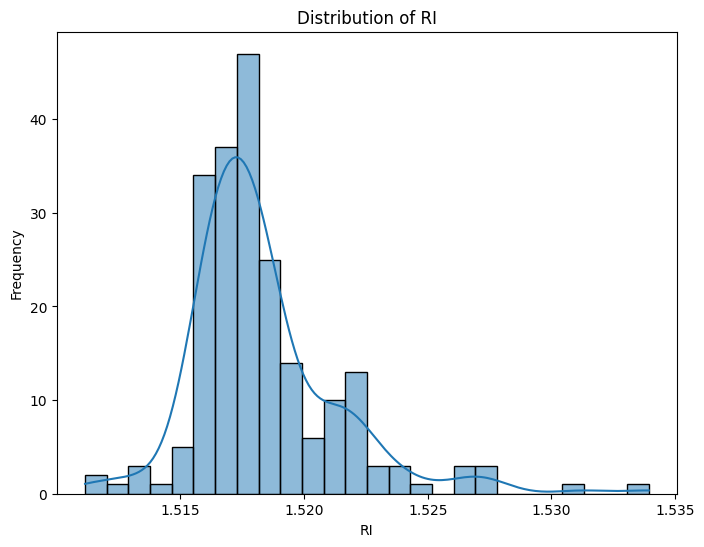

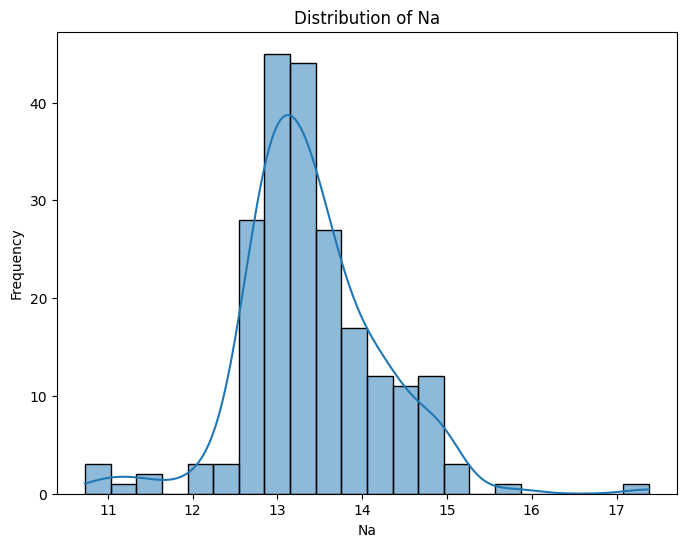

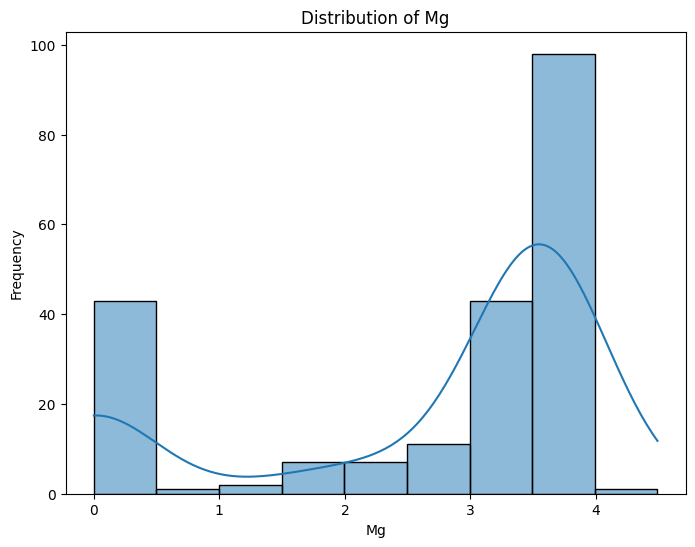

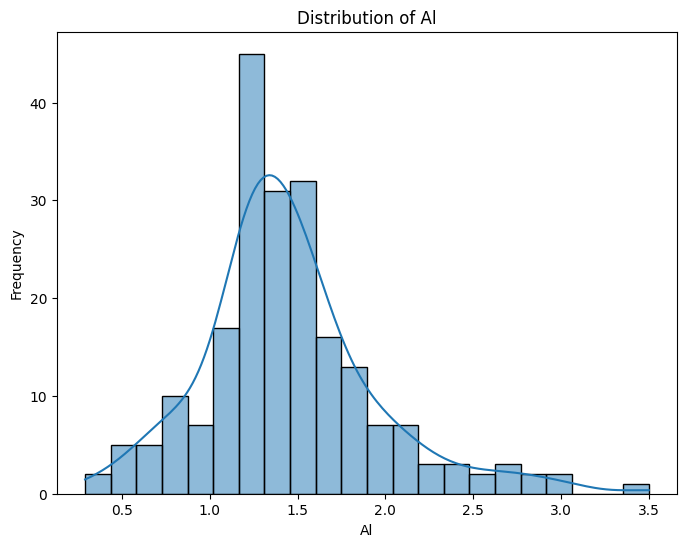

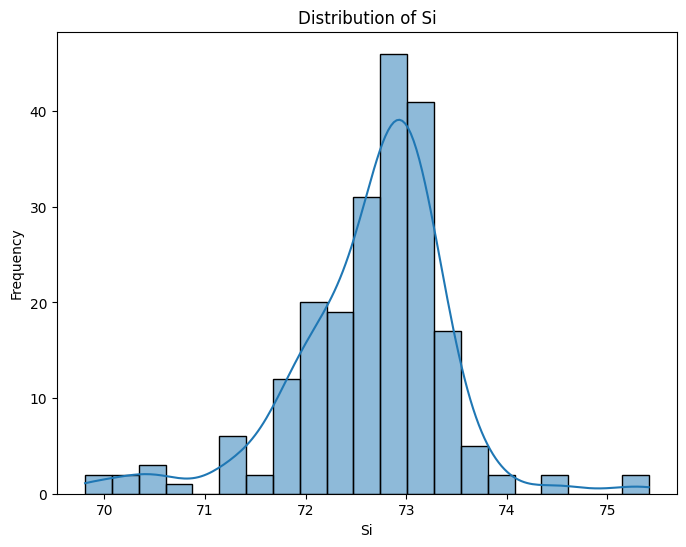

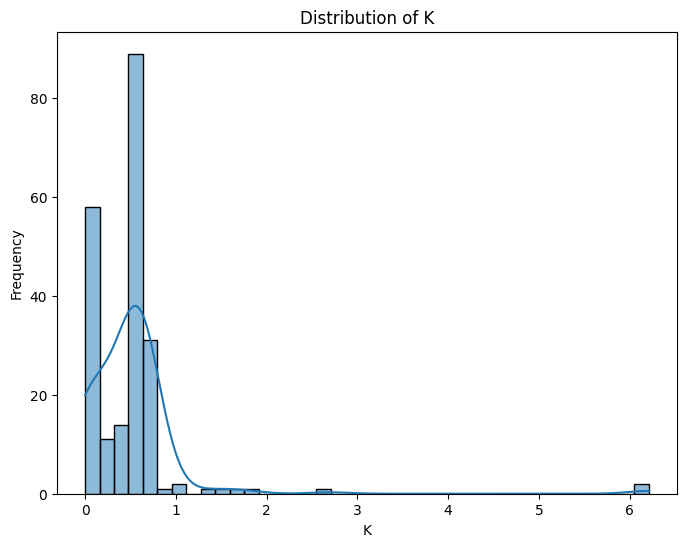

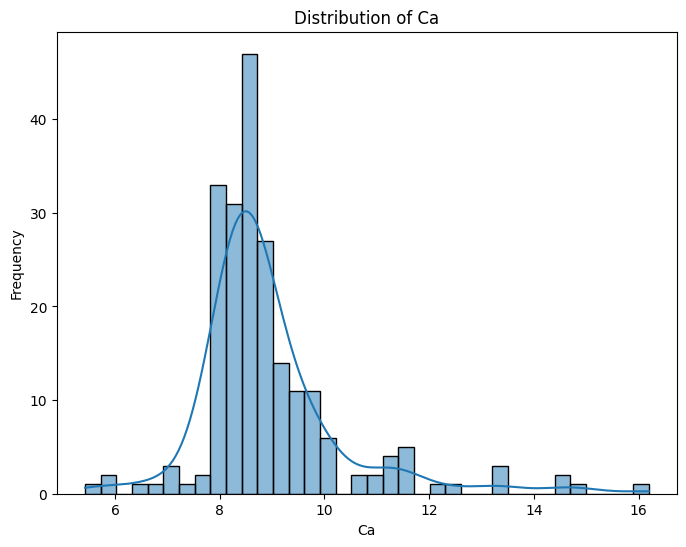

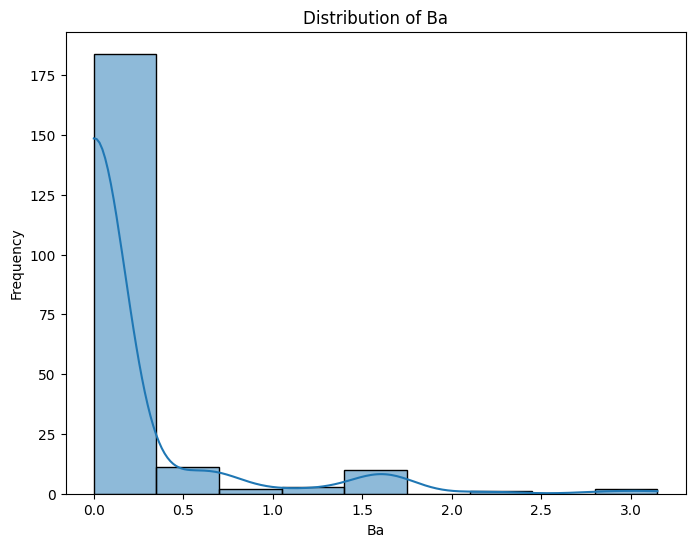

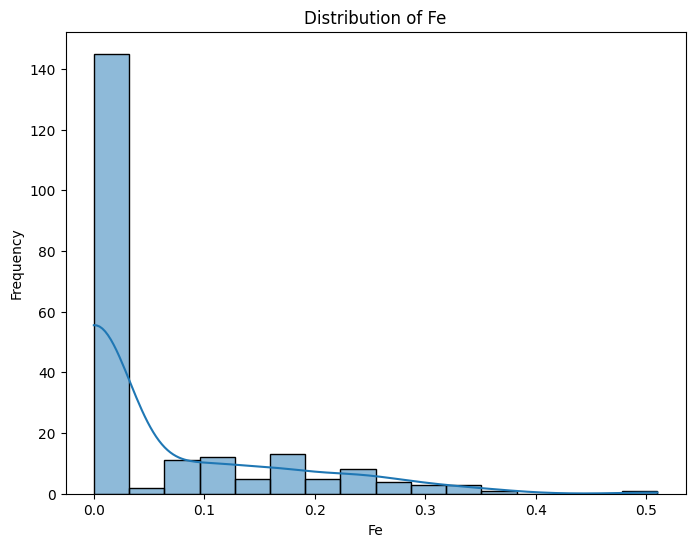

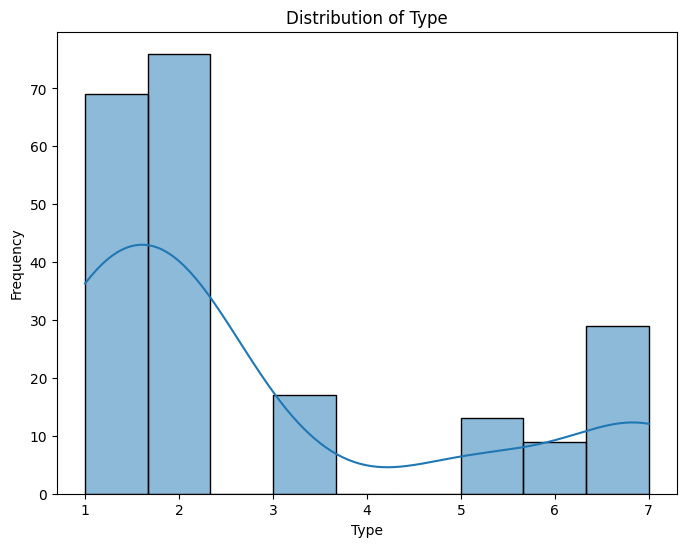

In [49]:
for feature in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

as we see the data is distributed in a skew so we can use log transform or squre root transform etc to make it normal but let see later

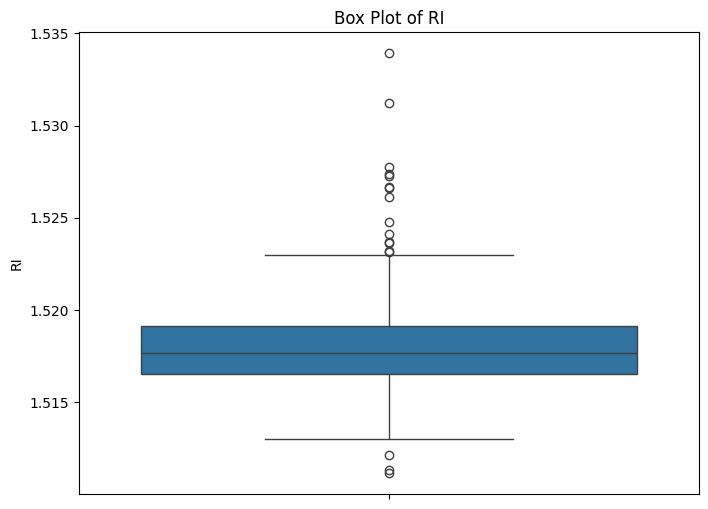

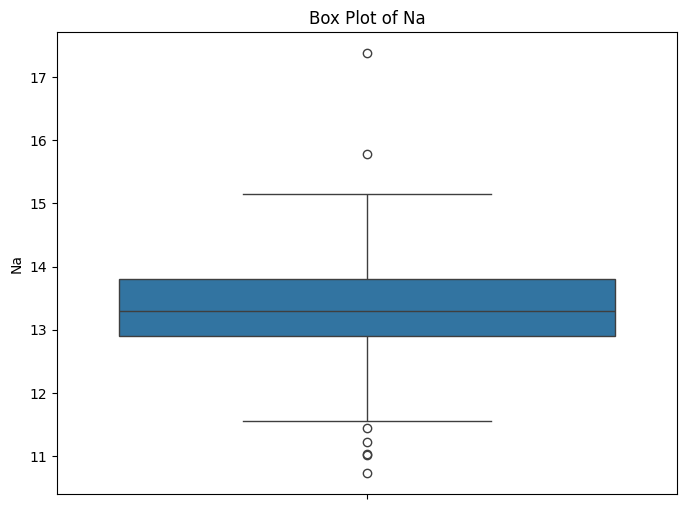

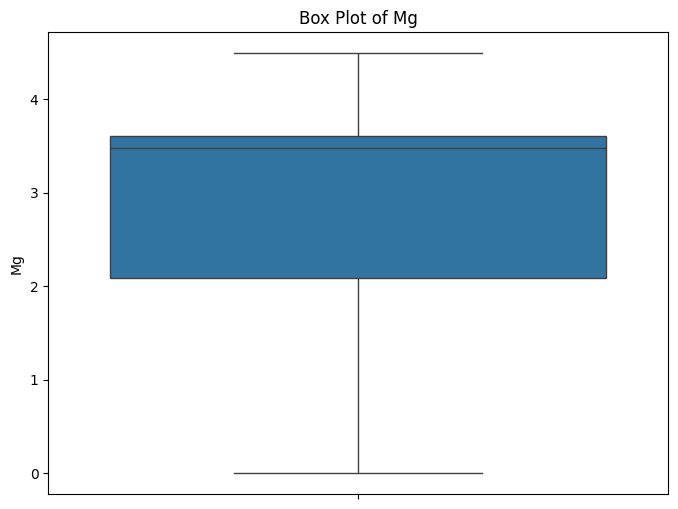

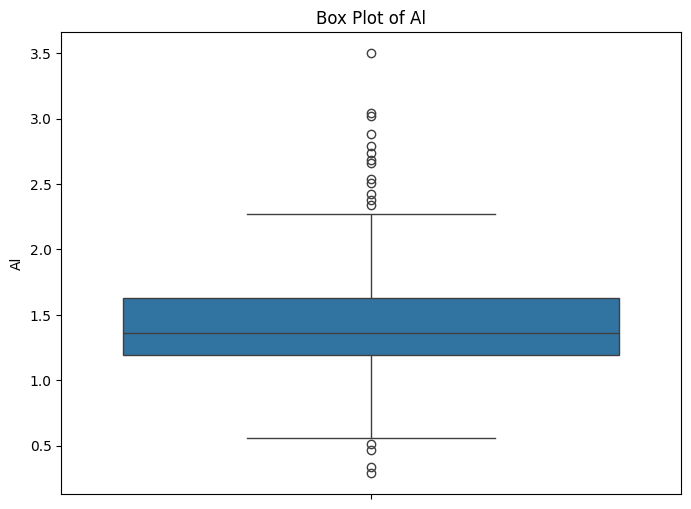

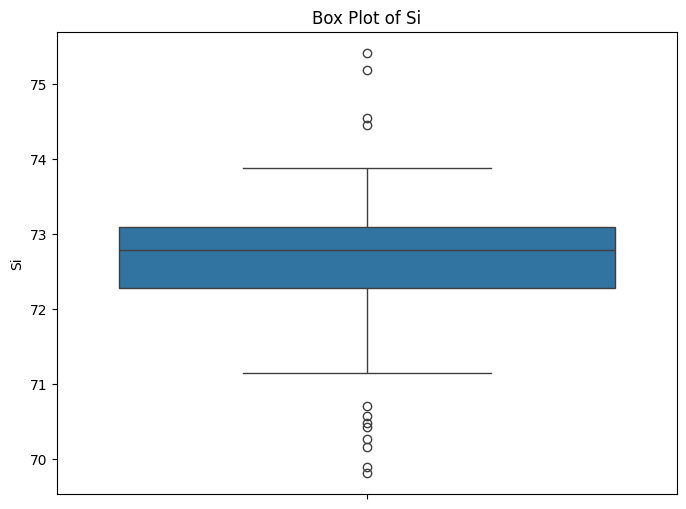

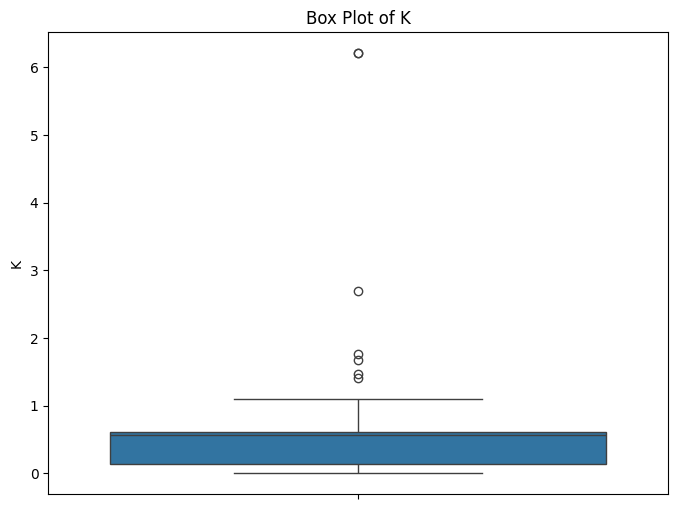

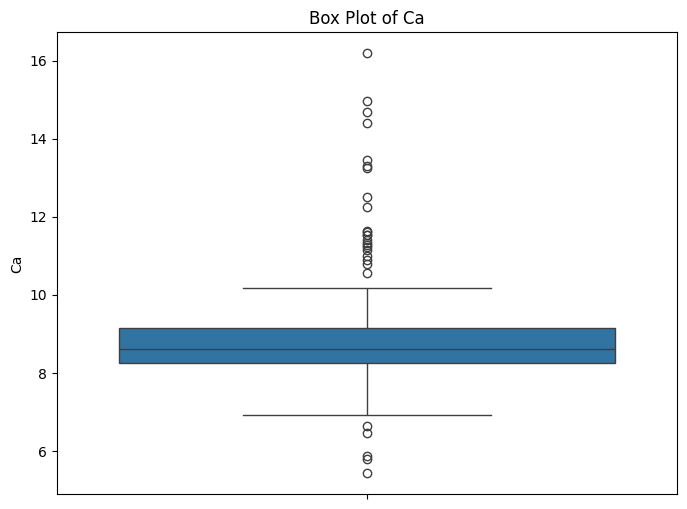

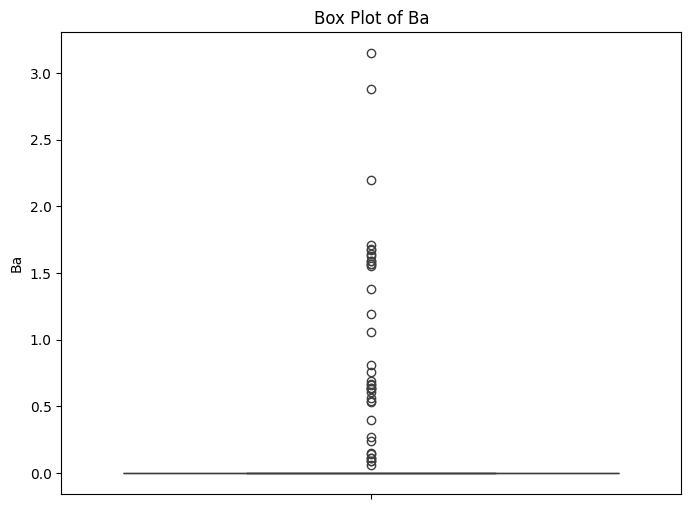

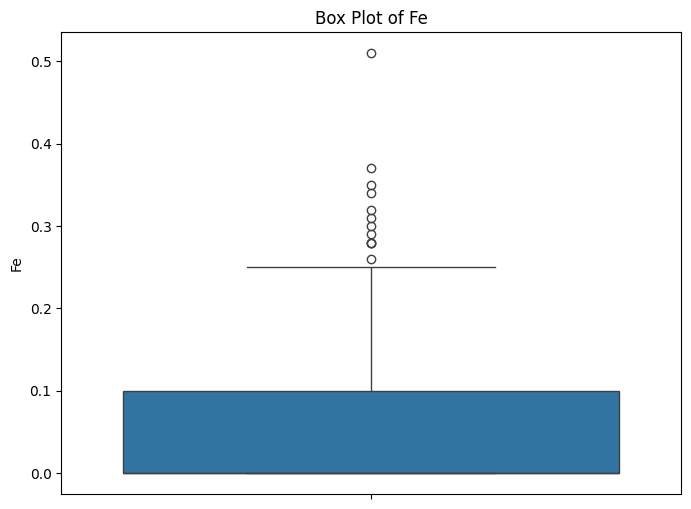

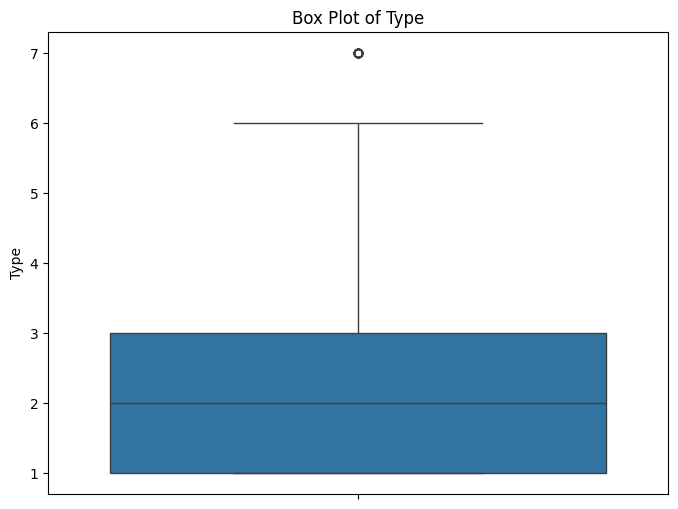

In [50]:
for feature in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.show()

now we can visualize the outliers

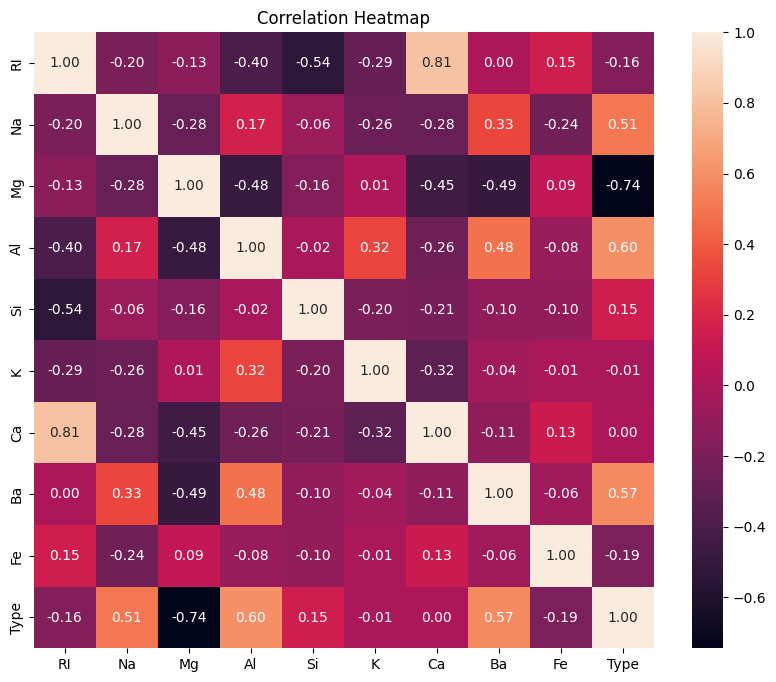

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

as we see few pired variables are highly correlated in both positive and negative

# 3: Data Preprocessing

there are no missing values and no categorical variables ,no need of treating outliers and using scalling function to make them equal

In [52]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to scale (all except 'Type')
columns_to_scale = df.columns.drop('Type')

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df.head())


         RI        Na        Mg        Al        Si         K        Ca   Ba  \
0  0.432836  0.437594  1.000000  0.252336  0.351786  0.009662  0.308550  0.0   
1  0.283582  0.475188  0.801782  0.333333  0.521429  0.077295  0.223048  0.0   
2  0.220808  0.421053  0.790646  0.389408  0.567857  0.062802  0.218401  0.0   
3  0.285777  0.372932  0.821826  0.311526  0.500000  0.091787  0.259294  0.0   
4  0.275241  0.381955  0.806236  0.295950  0.583929  0.088567  0.245353  0.0   

    Fe  Type  
0  0.0     1  
1  0.0     1  
2  0.0     1  
3  0.0     1  
4  0.0     1  


In [70]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,0.315968,0.402118,0.596704,0.361210,0.508048,0.080334,0.327517,0.055831,0.112308,2.788732
std,0.133142,0.122806,0.321535,0.154494,0.138214,0.105183,0.132517,0.158173,0.191352,2.105130
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.235733,0.326316,0.465479,0.280374,0.441071,0.020934,0.261152,0.000000,0.000000,1.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.090177,0.294610,0.000000,0.000000,2.000000
75%,0.351185,0.463158,0.801782,0.417445,0.585714,0.098229,0.345725,0.000000,0.196078,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# 4: Random Forest Model Implementation

In [72]:
from sklearn.model_selection import train_test_split

X = df.drop('Type', axis=1) # Features
y = df['Type']             # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted for multi-class
recall = recall_score(y_test, y_pred, average='weighted')      # Use weighted for multi-class
f1 = f1_score(y_test, y_pred, average='weighted')              # Use weighted for multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7674
Precision: 0.7824
Recall: 0.7674
F1-score: 0.7629


- Accuracy (76.74%)
- This means that 76.74% of predictions were correct overall.
- Accuracy is useful but can be misleading if the dataset is imbalanced.
- Precision (78.24%)
- Precision measures how many of the predicted positive cases were actually correct.
- A higher precision means fewer false positives.
- Recall (76.74%)
- Recall measures how many of the actual positive cases were correctly identified.
- A higher recall means fewer false negatives.
- F1-score (76.29%)
- The F1-score is the harmonic mean of precision and recall.

# 5: Bagging and Boosting Methods

In [77]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

# Bagging Classifier
bagging_classifier = BaggingClassifier(n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print("\n--- Bagging Results ---")
print(f"Accuracy: {accuracy_bagging:.4f}")
print(f"Precision: {precision_bagging:.4f}")
print(f"Recall: {recall_bagging:.4f}")
print(f"F1-score: {f1_bagging:.4f}")

# Gradient Boosting Classifier
boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
boosting_classifier.fit(X_train, y_train)
y_pred_boosting = boosting_classifier.predict(X_test)

# Evaluate Boosting
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')

print("\n--- Boosting Results ---")
print(f"Accuracy: {accuracy_boosting:.4f}")
print(f"Precision: {precision_boosting:.4f}")
print(f"Recall: {recall_boosting:.4f}")
print(f"F1-score: {f1_boosting:.4f}")



--- Bagging Results ---
Accuracy: 0.7907
Precision: 0.8128
Recall: 0.7907
F1-score: 0.7873

--- Boosting Results ---
Accuracy: 0.7209
Precision: 0.7425
Recall: 0.7209
F1-score: 0.7116


if we compare both the methods bagging is the best compare to boosting in all terms

# Additional Notes:

**1. Explain Bagging and Boosting methods. How is it different from each other.**
### **Bagging vs. Boosting in Machine Learning**
Bagging and Boosting are both **ensemble learning techniques** that improve model performance by combining multiple weak learners. However, they work differently.

---

### **1. Bagging (Bootstrap Aggregating)**
- **Concept:** Trains multiple models independently in parallel and averages their predictions.
- **How it works:**
  1. Creates multiple subsets of the dataset using **bootstrap sampling** (sampling with replacement).
  2. Trains a separate model on each subset.
  3. Combines predictions using **majority voting** (classification) or **averaging** (regression).
- **Goal:** Reduces **variance** and prevents overfitting.
- **Example Algorithm:** **Random Forest** (uses bagging with decision trees).

---

### **2. Boosting**
- **Concept:** Trains models sequentially, where each new model **corrects errors** made by the previous ones.
- **How it works:**
  1. Trains a weak model on the dataset.
  2. Identifies misclassified samples and assigns them **higher weights**.
  3. Trains the next model to focus on these difficult cases.
  4. Continues until a strong model is built.
- **Goal:** Reduces **bias** and improves accuracy.
- **Example Algorithms:** **AdaBoost, Gradient Boosting, XGBoost, LightGBM**.
Here are the **key differences** between **Bagging** and **Boosting** in points:
---
1. **Training Process**  
   - Bagging trains models **independently in parallel**.  
   - Boosting trains models **sequentially**, where each model corrects the errors of the previous one.

2. **Goal**  
   - Bagging aims to **reduce variance** and prevent overfitting.  
   - Boosting aims to **reduce bias** and improve weak learners.

3. **Handling Errors**  
   - Bagging does not explicitly focus on correcting errors.  
   - Boosting assigns **higher weights** to misclassified samples, making the next model focus on them.

4. **Final Prediction**  
   - Bagging combines predictions using **majority voting** (classification) or **averaging** (regression).  
   - Boosting uses a **weighted combination** of all models.

5. **Common Algorithms**  
   - Bagging: **Random Forest** (uses Bagging with decision trees).  
   - Boosting: **AdaBoost, Gradient Boosting, XGBoost**.

6. **Best for**  
   - Bagging works well for **high variance models** (e.g., decision trees).  
   - Boosting is useful for **weak models that need improvement**.

7. **Risk of Overfitting**  
   - Bagging has **lower risk** due to independent models.  
   - Boosting has **higher risk** if too many weak learners are added.

**2.Explain how to handle imbalance in the data.**
Handling imbalanced data is crucial for improving model performance, especially in classification tasks. Here are some effective techniques:

1. **Resampling Techniques**  
   - **Oversampling**: Increase the number of samples in the minority class (e.g., using SMOTE).  
   - **Undersampling**: Reduce the number of samples in the majority class to balance the dataset.

2. **Data Augmentation**  
   - Generate synthetic data points for the minority class to improve representation.

3. **Synthetic Minority Over-Sampling Technique (SMOTE)**  
   - Creates synthetic samples for the minority class using nearest neighbors.

4. **Ensemble Techniques**  
   - Use models like **BalancedBaggingClassifier** or **Boosting methods** that adjust weights for minority class samples.

5. **One-Class Classification**  
   - Train the model to recognize only the minority class, treating the majority class as background noise.

6. **Cost-Sensitive Learning**  
   - Assign higher misclassification costs to the minority class to make the model more sensitive to it.

7. **Evaluation Metrics for Imbalanced Data**  
   - Use **Precision, Recall, F1-score, and AUC-ROC** instead of accuracy to assess model performance.


In [78]:
print(df['Type'].value_counts())

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64


so as we can see the data distribution in target variable is imbalanced so we can use any one of the above method for better performance